In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_excel("Case_study_DataSet.xlsx",sheet_name=1)

In [4]:
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,HelpPage,HelpPage_TimeSpent,ViewItem,ViewItem_TimeSpent,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag
0,Jan,False,2,2,1,3,0.462560,783,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Existing,False
1,Jan,False,4,1,1,3,0.859220,748,0,0.0,0,0.0,4,88.000000,0.000000,0.050000,0.0,0.0,Existing,False
2,Jan,True,4,1,1,5,0.032907,835,0,0.0,0,0.0,7,208.000000,0.000000,0.028571,0.0,0.0,Existing,False
3,Jan,False,3,2,1,3,0.290953,649,0,0.0,0,0.0,21,1146.333333,0.000000,0.012963,0.0,0.8,Existing,False
4,Jan,False,2,2,2,3,0.024576,653,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Existing,False


In [5]:
df['Weekend']=df['Weekend'].map({False:'Weekdays',True:'Weekend'}) # For better readiability

In [6]:
df['Customer Type'].unique()

array(['Existing', ' NewlyAcquired', ' Existing', ' Undetermined'],
      dtype=object)

In [7]:
df['Customer Type']=df['Customer Type'].map({'Existing':'Existing',' Existing':'Existing',' NewlyAcquired':'NewlyAcquired',' Undetermined':'Undetermined'})

In [8]:
df['Customer Type'].unique()

array(['Existing', 'NewlyAcquired', 'Undetermined'], dtype=object)

In [9]:
df.isnull().sum()

Month                     0
Weekend                   0
Ana_1                     0
Ana_2                     0
Ana_3                     0
Ana_4                     0
Ana_5                     0
Ana_6                     0
SellerPortal              0
SellerPortal_timespent    0
HelpPage                  0
HelpPage_TimeSpent        0
ViewItem                  0
ViewItem_TimeSpent        0
PageNotLoadingRate        0
PageExitRate              0
PageValues                0
Holiday_Spl_day           0
Customer Type             0
Conversion_Flag           0
dtype: int64

Noted : No null values in the dataset

### EDA

In [10]:
Sales_not_converted_month=df[df['Conversion_Flag']==False].groupby(['Month'])['Weekend'].count()
Sales_converted_month=df[df['Conversion_Flag']==True].groupby(['Month'])['Weekend'].count()

In [11]:
Sales_converted_month_df=pd.DataFrame({'Not_converted':Sales_not_converted_month,"Converted":Sales_converted_month})
Sales_converted_month_df.sort_index(axis=1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Sales_converted_month_df =Sales_converted_month_df.reindex(months, axis=0)
Sales_converted_month_df['Target']=Sales_converted_month_df['Not_converted']+Sales_converted_month_df['Converted']
Sales_converted_month_df['Converted_ratio']=Sales_converted_month_df['Converted']/Sales_converted_month_df['Target']

In [12]:
Sales_converted_month_df

,Not_converted,Converted,Target,Converted_ratio
Month,,,,
Jan,90,55,145,0.379310
Feb,280,48,328,0.146341
Mar,1810,242,2052,0.117934
Apr,104,41,145,0.282759
May,3098,411,3509,0.117127
Jun,359,74,433,0.170901
Jul,464,113,577,0.195841
Aug,460,117,577,0.202773
Sep,463,129,592,0.217905


* Month which had higher conversion [>20%] are Jan,Apr,Nov,Oct,Sept,Aug,Jul

In [13]:
Sales_converted_not_week_df=df[df['Conversion_Flag']==False].groupby(['Weekend'])['Weekend'].count()
Sales_converted_week_df=df[df['Conversion_Flag']==True].groupby(['Weekend'])['Weekend'].count()

Sales_converted_week_df_df=pd.DataFrame({'Not_converted':Sales_converted_not_week_df,"Converted":Sales_converted_week_df})
Sales_converted_week_df_df['Target']=Sales_converted_week_df_df['Not_converted']+Sales_converted_week_df_df['Converted']
Sales_converted_week_df_df['Converted_ratio']=Sales_converted_week_df_df['Converted']/Sales_converted_week_df_df['Target']

Sales_converted_week_df_df

,Not_converted,Converted,Target,Converted_ratio
Weekend,,,,
Weekdays,9016,1831,10847,0.168802
Weekend,2584,633,3217,0.196767


* Conversion seems higher on the weekend [20%]

In [14]:
Sales_not_converted_month=df[df['Conversion_Flag']==False].groupby(['Month','Weekend'])['Weekend'].count()
Sales_converted_month=df[df['Conversion_Flag']==True].groupby(['Month','Weekend'])['Weekend'].count()

Sales_converted_month_df=pd.DataFrame({'Not_converted':Sales_not_converted_month,"Converted":Sales_converted_month})

Sales_converted_month_df['Target']=Sales_converted_month_df['Not_converted']+Sales_converted_month_df['Converted']
Sales_converted_month_df['Converted_ratio']=Sales_converted_month_df['Converted']/Sales_converted_month_df['Target']

Sales_converted_month_df=Sales_converted_month_df.reset_index()
# Sales_converted_month_df=Sales_converted_month_df.set_index('Month')
Sales_converted_month_df

Sales_converted_month_df["Month"] = pd.to_datetime(Sales_converted_month_df.Month, format='%b', errors='coerce').dt.month
Sales_converted_month_df = Sales_converted_month_df.sort_values(by="Month")

Sales_converted_month_df['Month'] =Sales_converted_month_df['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
Sales_converted_month_df.set_index('Month')

,Weekend,Not_converted,Converted,Target,Converted_ratio
Month,,,,,
Jan,Weekdays,74,40,114,0.350877
Jan,Weekend,16,15,31,0.483871
Feb,Weekdays,232,38,270,0.140741
Feb,Weekend,48,10,58,0.172414
Mar,Weekend,436,70,506,0.138340
Mar,Weekdays,1374,172,1546,0.111255
Apr,Weekdays,87,34,121,0.280992
Apr,Weekend,17,7,24,0.291667
May,Weekend,630,109,739,0.147497


* For January,September,July conversion rate is higher in *Weekends.*
* For April,November,October,August no much difference is seen between weekend and *Weekdays.*

In [15]:
Sales_converted_not_Customer_Type_df=df[df['Conversion_Flag']==False].groupby(['Customer Type'])['Weekend'].count()
Sales_converted_Customer_Type_df=df[df['Conversion_Flag']==True].groupby(['Customer Type'])['Weekend'].count()

Sales_converted_Customer_Type_df=pd.DataFrame({'Not_converted':Sales_converted_not_Customer_Type_df,"Converted":Sales_converted_Customer_Type_df})
Sales_converted_Customer_Type_df['Target']=Sales_converted_Customer_Type_df['Not_converted']+Sales_converted_Customer_Type_df['Converted']
Sales_converted_Customer_Type_df['Converted_ratio']=Sales_converted_Customer_Type_df['Converted']/Sales_converted_Customer_Type_df['Target']

Sales_converted_Customer_Type_df

,Not_converted,Converted,Target,Converted_ratio
Customer Type,,,,
Existing,10121,1909,12030,0.158687
NewlyAcquired,1406,539,1945,0.277121
Undetermined,73,16,89,0.179775


* New cutomser using the coupon wisely based on the above data.
* Coupon Stragey of targeting the customer customer doesn't seems like working well

In [16]:
Sales_not_converted_mon_customer=df[df['Conversion_Flag']==False].groupby(['Month','Customer Type'])['Weekend'].count()
Sales_converted_mon_customer=df[df['Conversion_Flag']==True].groupby(['Month','Customer Type'])['Weekend'].count()

Sales_converted_mon_customer_df=pd.DataFrame({'Not_converted':Sales_not_converted_mon_customer,"Converted":Sales_converted_mon_customer})

Sales_converted_mon_customer_df.fillna(0,inplace=True)
Sales_converted_mon_customer_df['Target']=Sales_converted_mon_customer_df['Not_converted']+Sales_converted_mon_customer_df['Converted']
Sales_converted_mon_customer_df['Converted_ratio']=Sales_converted_mon_customer_df['Converted']/Sales_converted_mon_customer_df['Target']
Sales_converted_mon_customer_df


Not_converted  Converted  Target  Converted_ratio
Month Customer Type                                                   
Apr   Existing                  94       34.0   128.0         0.265625
      NewlyAcquired             10        7.0    17.0         0.411765
Aug   Existing                 398       87.0   485.0         0.179381
      NewlyAcquired             62       30.0    92.0         0.326087
Dec   Existing                1289      164.0  1453.0         0.112870
      NewlyAcquired            268       88.0   356.0         0.247191
      Undetermined              49       13.0    62.0         0.209677
Feb   Existing                 265       45.0   310.0         0.145161
      NewlyAcquired             14        3.0    17.0         0.176471
      Undetermined               1        0.0     1.0         0.000000
Jan   Existing                  77       41.0   118.0         0.347458
      NewlyAcquired             13       14.0    27.0         0.518519
Jul   Existing                 414       96.0   510.0         0.188235
      NewlyAcquired             50       17.0    67.0         0.253731
Jun   Existing                 323       60.0   383.0         0.156658
      NewlyAcquired             34       14.0    48.0         0.291667
      Undetermined               2        0.0     2.0         0.000000
Mar   Existing                1604      191.0  1795.0         0.106407
      NewlyAcquired            205       51.0   256.0         0.199219
      Undetermined               1        0.0     1.0         0.000000
May   Existing                2852      313.0  3165.0         0.098894
      NewlyAcquired            246       98.0   344.0         0.284884
Nov   Existing                2011      659.0  2670.0         0.246816
      NewlyAcquired            307      143.0   450.0         0.317778
      Undetermined              19        3.0    22.0         0.136364
Oct   Existing                 421      126.0   547.0         0.230347
      NewlyAcquired            108       38.0   146.0         0.260274
Sep   Existing                 373       93.0   466.0         0.199571
      NewlyAcquired             89       36.0   125.0         0.288000
      Undetermined               1        0.0     1.0         0.000000

### Data Preprocessing 

In [17]:
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,HelpPage,HelpPage_TimeSpent,ViewItem,ViewItem_TimeSpent,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag
0,Jan,Weekdays,2,2,1,3,0.462560,783,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Existing,False
1,Jan,Weekdays,4,1,1,3,0.859220,748,0,0.0,0,0.0,4,88.000000,0.000000,0.050000,0.0,0.0,Existing,False
2,Jan,Weekend,4,1,1,5,0.032907,835,0,0.0,0,0.0,7,208.000000,0.000000,0.028571,0.0,0.0,Existing,False
3,Jan,Weekdays,3,2,1,3,0.290953,649,0,0.0,0,0.0,21,1146.333333,0.000000,0.012963,0.0,0.8,Existing,False
4,Jan,Weekdays,2,2,2,3,0.024576,653,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Existing,False


### Handling Categorical Variable

* Since Month have order involved treating Month feature has ordinal feature

In [18]:
#Encoding the month column
df['Month']=df['Month'].map({'Jan':1, 'Feb':2, 'Mar':3,'Apr':4, 'May':5,
            'Jun' :6, 'Jul':7, 'Aug':8, 'Sep' :9, 'Oct' :10, 'Nov' :11, 'Dec':12})

In [19]:
df['Ana_1'].unique()

array([2, 4, 3, 1, 7, 8, 6, 5], dtype=int64)

In [20]:
df['Ana_2'].unique()

array([ 2,  1,  6,  7,  5, 10,  4,  3,  8,  9, 13, 12, 11], dtype=int64)

In [21]:
df['Ana_3'].unique()

array([1, 2, 9, 3, 6, 4, 7, 8, 5], dtype=int64)

In [22]:
df['Ana_4'].unique()

array([ 3,  5,  7,  2,  1,  4,  6, 10,  8, 13, 11,  9, 12, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

Due to lack of information treating Ana_1,Ana_2,Ana_3,Ana_4 has ordinal as given

In [23]:
df['Weekend'].unique()

array(['Weekdays', 'Weekend'], dtype=object)

In [24]:
df['Weekend_ohe']=df['Weekend'].map({'Weekend':1,'Weekdays':0})

In [25]:
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,...,HelpPage_TimeSpent,ViewItem,ViewItem_TimeSpent,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag,Weekend_ohe
0,1,Weekdays,2,2,1,3,0.462560,783,0,0.0,...,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Existing,False,0
1,1,Weekdays,4,1,1,3,0.859220,748,0,0.0,...,0.0,4,88.000000,0.000000,0.050000,0.0,0.0,Existing,False,0
2,1,Weekend,4,1,1,5,0.032907,835,0,0.0,...,0.0,7,208.000000,0.000000,0.028571,0.0,0.0,Existing,False,1
3,1,Weekdays,3,2,1,3,0.290953,649,0,0.0,...,0.0,21,1146.333333,0.000000,0.012963,0.0,0.8,Existing,False,0
4,1,Weekdays,2,2,2,3,0.024576,653,0,0.0,...,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Existing,False,0


In [26]:
df.columns

Index(['Month', 'Weekend', 'Ana_1', 'Ana_2', 'Ana_3', 'Ana_4', 'Ana_5',
       'Ana_6', 'SellerPortal', 'SellerPortal_timespent', 'HelpPage',
       'HelpPage_TimeSpent', 'ViewItem', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day',
       'Customer Type', 'Conversion_Flag', 'Weekend_ohe'],
      dtype='object')

In [27]:
dummy_Customer_Type=pd.get_dummies(df['Customer Type'],drop_first=False,)
dummy_Customer_Type

,Existing,NewlyAcquired,Undetermined
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
14059,1,0,0
14060,1,0,0
14061,1,0,0
14062,1,0,0


In [28]:
#Applying One hot encoding on the feature "Customer Type"
df=pd.concat([df,dummy_Customer_Type],axis=1)
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,...,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag,Weekend_ohe,Existing,NewlyAcquired,Undetermined
0,1,Weekdays,2,2,1,3,0.462560,783,0,0.0,...,0.015789,0.024561,0.0,0.0,Existing,False,0,1,0,0
1,1,Weekdays,4,1,1,3,0.859220,748,0,0.0,...,0.000000,0.050000,0.0,0.0,Existing,False,0,1,0,0
2,1,Weekend,4,1,1,5,0.032907,835,0,0.0,...,0.000000,0.028571,0.0,0.0,Existing,False,1,1,0,0
3,1,Weekdays,3,2,1,3,0.290953,649,0,0.0,...,0.000000,0.012963,0.0,0.8,Existing,False,0,1,0,0
4,1,Weekdays,2,2,2,3,0.024576,653,0,0.0,...,0.200000,0.200000,0.0,0.0,Existing,False,0,1,0,0


In [29]:
# for better view converting Conversion_Flag from boolean to binary
df['Conversion_Flag']=df['Conversion_Flag'].map({True:1,False:0})

In [30]:
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,...,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag,Weekend_ohe,Existing,NewlyAcquired,Undetermined
0,1,Weekdays,2,2,1,3,0.462560,783,0,0.0,...,0.015789,0.024561,0.0,0.0,Existing,0,0,1,0,0
1,1,Weekdays,4,1,1,3,0.859220,748,0,0.0,...,0.000000,0.050000,0.0,0.0,Existing,0,0,1,0,0
2,1,Weekend,4,1,1,5,0.032907,835,0,0.0,...,0.000000,0.028571,0.0,0.0,Existing,0,1,1,0,0
3,1,Weekdays,3,2,1,3,0.290953,649,0,0.0,...,0.000000,0.012963,0.0,0.8,Existing,0,0,1,0,0
4,1,Weekdays,2,2,2,3,0.024576,653,0,0.0,...,0.200000,0.200000,0.0,0.0,Existing,0,0,1,0,0


### EDA on Numeric feature

In [31]:
df.groupby(['SellerPortal','Conversion_Flag'])['Month'].count()

SellerPortal  Conversion_Flag
0             0                  5915
              1                   636
1             0                  1175
              1                   387
2             0                   999
              1                   260
3             0                   806
              1                   228
4             0                   684
              1                   198
5             0                   505
              1                   158
6             0                   346
              1                   140
7             0                   295
              1                    86
8             0                   233
              1                   104
9             0                   179
              1                    86
10            0                   138
              1                    38
11            0                    83
              1                    43
12            0                    72
              1     

* Most of people are target entering the seller_portal 0

In [32]:
df.groupby(['Conversion_Flag'])['SellerPortal_timespent'].mean()

Conversion_Flag
0     71.905325
1    120.618196
Name: SellerPortal_timespent, dtype: float64

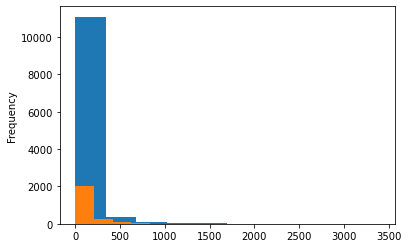

In [33]:
df[df['Conversion_Flag']==False]['SellerPortal_timespent'].plot(kind='hist')
df[df['Conversion_Flag']==True]['SellerPortal_timespent'].plot(kind='hist')

In [34]:
print(df[df['Conversion_Flag']==False]['SellerPortal_timespent'].mean())
print(df[df['Conversion_Flag']==True]['SellerPortal_timespent'].mean())
print('')
print('')
print(df[df['Conversion_Flag']==False]['SellerPortal_timespent'].std())
print(df[df['Conversion_Flag']==True]['SellerPortal_timespent'].std())

71.90532456471554
120.61819615661972


167.37707236227084
206.98165583257557


* Customer who spend more time on seller portal are likely to convert

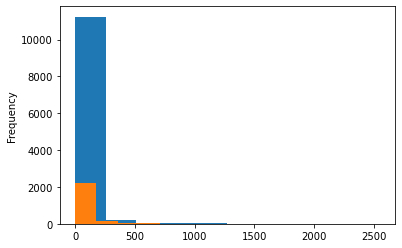

In [35]:
df[df['Conversion_Flag']==False]['HelpPage_TimeSpent'].plot(kind='hist')
df[df['Conversion_Flag']==True]['HelpPage_TimeSpent'].plot(kind='hist')

In [36]:
print(df[df['Conversion_Flag']==False]['HelpPage_TimeSpent'].mean())
print(df[df['Conversion_Flag']==True]['HelpPage_TimeSpent'].mean())
print('')
print('')
print(df[df['Conversion_Flag']==False]['HelpPage_TimeSpent'].std())
print(df[df['Conversion_Flag']==True]['HelpPage_TimeSpent'].std())

29.027036818204852
55.508859347152594


131.37697245451494
170.01503876593284


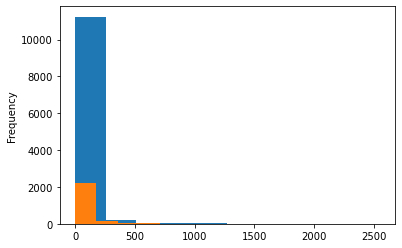

In [37]:
df[df['Conversion_Flag']==False]['HelpPage_TimeSpent'].plot(kind='hist')
df[df['Conversion_Flag']==True]['HelpPage_TimeSpent'].plot(kind='hist')

In [38]:
print(df[df['Conversion_Flag']==False]['ViewItem_TimeSpent'].mean())
print(df[df['Conversion_Flag']==True]['ViewItem_TimeSpent'].mean())
print('')
print('')
print(df[df['Conversion_Flag']==False]['ViewItem_TimeSpent'].std())
print(df[df['Conversion_Flag']==True]['ViewItem_TimeSpent'].std())

1046.5214198708577
1887.5535792105668


1774.6154543256619
2315.858478176994


In [39]:
'PageNotLoadingRate', 'PageExitRate', 'PageValues',

('PageNotLoadingRate', 'PageExitRate', 'PageValues')

In [40]:
df[df['Conversion_Flag']==False].groupby('Month')['PageNotLoadingRate'].mean()

Month
1     0.036737
2     0.042219
3     0.024048
4     0.031067
5     0.029767
6     0.037106
7     0.027134
8     0.023949
9     0.020036
10    0.015315
11    0.024178
12    0.023282
Name: PageNotLoadingRate, dtype: float64

In [41]:
df[df['Conversion_Flag']==True].groupby('Month')['PageNotLoadingRate'].mean()

Month
1     0.004138
2     0.006089
3     0.003309
4     0.005128
5     0.004169
6     0.005841
7     0.006946
8     0.005168
9     0.006130
10    0.006668
11    0.006048
12    0.003290
Name: PageNotLoadingRate, dtype: float64

In [42]:
df.groupby('Conversion_Flag')['PageNotLoadingRate'].mean()

Conversion_Flag
0    0.026061
1    0.005151
Name: PageNotLoadingRate, dtype: float64

* End User facing less page error rate likely have higher chance of conversion

In [43]:
df[df['Conversion_Flag']==True].groupby('Month')['PageExitRate'].mean()

Month
1     0.016996
2     0.022288
3     0.016533
4     0.021119
5     0.018181
6     0.020700
7     0.023542
8     0.018217
9     0.023198
10    0.021959
11    0.020147
12    0.018074
Name: PageExitRate, dtype: float64

In [44]:
df[df['Conversion_Flag']==False].groupby('Month')['PageExitRate'].mean()

Month
1     0.057076
2     0.068236
3     0.048102
4     0.054080
5     0.052700
6     0.062352
7     0.049771
8     0.045526
9     0.039642
10    0.034530
11    0.044755
12    0.045442
Name: PageExitRate, dtype: float64

In [45]:
df.groupby('Conversion_Flag')['PageExitRate'].mean()

Conversion_Flag
0    0.048346
1    0.019590
Name: PageExitRate, dtype: float64

In [46]:
df.columns

Index(['Month', 'Weekend', 'Ana_1', 'Ana_2', 'Ana_3', 'Ana_4', 'Ana_5',
       'Ana_6', 'SellerPortal', 'SellerPortal_timespent', 'HelpPage',
       'HelpPage_TimeSpent', 'ViewItem', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day',
       'Customer Type', 'Conversion_Flag', 'Weekend_ohe', 'Existing',
       'NewlyAcquired', 'Undetermined'],
      dtype='object')

On analyzing the PageExitRate and PageNotLoadingRate , User who had better user experience are likely to convert

In [ ]:
##feature

In [47]:
df[['Ana_5','Ana_6','SellerPortal_timespent','HelpPage_TimeSpent', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day','Conversion_Flag']].corr()

,Ana_5,Ana_6,SellerPortal_timespent,HelpPage_TimeSpent,ViewItem_TimeSpent,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Conversion_Flag
Ana_5,1.000000,-0.010380,0.003976,-0.006870,0.002964,-0.006885,-0.012250,0.017325,-0.012743,0.042013
Ana_6,-0.010380,1.000000,-0.007204,-0.024647,-0.005937,0.017604,0.013463,-0.000284,0.004361,-0.002303
SellerPortal_timespent,0.003976,-0.007204,1.000000,0.233749,0.346733,-0.146652,-0.209339,0.069213,-0.075406,0.105257
HelpPage_TimeSpent,-0.006870,-0.024647,0.233749,1.000000,0.337742,-0.073161,-0.103640,0.029872,-0.030580,0.072278
ViewItem_TimeSpent,0.002964,-0.005937,0.346733,0.337742,1.000000,-0.186367,-0.255539,0.050618,-0.038483,0.167601
PageNotLoadingRate,-0.006885,0.017604,-0.146652,-0.073161,-0.186367,1.000000,0.913532,-0.126380,0.074964,-0.163179
PageExitRate,-0.012250,0.013463,-0.209339,-0.103640,-0.255539,0.913532,1.000000,-0.183441,0.104032,-0.223856
PageValues,0.017325,-0.000284,0.069213,0.029872,0.050618,-0.126380,-0.183441,1.000000,-0.067431,0.500306
Holiday_Spl_day,-0.012743,0.004361,-0.075406,-0.030580,-0.038483,0.074964,0.104032,-0.067431,1.000000,-0.086369
Conversion_Flag,0.042013,-0.002303,0.105257,0.072278,0.167601,-0.163179,-0.223856,0.500306,-0.086369,1.000000


### Model

#### Feature selection

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
random_state=1

In [49]:
df.head()

,Month,Weekend,Ana_1,Ana_2,Ana_3,Ana_4,Ana_5,Ana_6,SellerPortal,SellerPortal_timespent,...,PageNotLoadingRate,PageExitRate,PageValues,Holiday_Spl_day,Customer Type,Conversion_Flag,Weekend_ohe,Existing,NewlyAcquired,Undetermined
0,1,Weekdays,2,2,1,3,0.462560,783,0,0.0,...,0.015789,0.024561,0.0,0.0,Existing,0,0,1,0,0
1,1,Weekdays,4,1,1,3,0.859220,748,0,0.0,...,0.000000,0.050000,0.0,0.0,Existing,0,0,1,0,0
2,1,Weekend,4,1,1,5,0.032907,835,0,0.0,...,0.000000,0.028571,0.0,0.0,Existing,0,1,1,0,0
3,1,Weekdays,3,2,1,3,0.290953,649,0,0.0,...,0.000000,0.012963,0.0,0.8,Existing,0,0,1,0,0
4,1,Weekdays,2,2,2,3,0.024576,653,0,0.0,...,0.200000,0.200000,0.0,0.0,Existing,0,0,1,0,0


In [50]:
df.columns

Index(['Month', 'Weekend', 'Ana_1', 'Ana_2', 'Ana_3', 'Ana_4', 'Ana_5',
       'Ana_6', 'SellerPortal', 'SellerPortal_timespent', 'HelpPage',
       'HelpPage_TimeSpent', 'ViewItem', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day',
       'Customer Type', 'Conversion_Flag', 'Weekend_ohe', 'Existing',
       'NewlyAcquired', 'Undetermined'],
      dtype='object')

In [51]:
data=df[['Month','Ana_1', 'Ana_2', 'Ana_3', 'Ana_4', 'Ana_5',
       'Ana_6', 'SellerPortal', 'SellerPortal_timespent', 'HelpPage',
       'HelpPage_TimeSpent', 'ViewItem', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day',
       'Conversion_Flag', 'Weekend_ohe', 'Existing',
       'NewlyAcquired', 'Undetermined']]

In [52]:
data.shape

(14064, 22)

In [53]:
X=data.drop('Conversion_Flag',axis=1)
y=data['Conversion_Flag']

#### OLS Method

In [54]:
import statsmodels.api as sm
log_reg = sm.Logit(y,X).fit()
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.314381
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        Conversion_Flag   No. Observations:                14064
Model:                          Logit   Df Residuals:                    14043
Method:                           MLE   Df Model:                           20
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.3225
Time:                        10:42:29   Log-Likelihood:                -4421.5
converged:                       True   LL-Null:                       -6526.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Month                      0.0485      0.009      5.681      0.000       0.032      

Observation having P-vale less than or equal to 5% are good predicators

#### Feature Importance

In [55]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
clf.feature_importances_ 

array([0.03268361, 0.01423101, 0.0147861 , 0.02406683, 0.02602093,
       0.05745046, 0.05486503, 0.03682666, 0.04919078, 0.01524251,
       0.02139045, 0.06211472, 0.07357915, 0.0452899 , 0.07874082,
       0.36753577, 0.00393261, 0.00831615, 0.00635939, 0.00696638,
       0.00041074])

In [108]:
X.columns

Index(['Month', 'Ana_1', 'Ana_2', 'Ana_3', 'Ana_4', 'Ana_5', 'Ana_6',
       'SellerPortal', 'SellerPortal_timespent', 'HelpPage',
       'HelpPage_TimeSpent', 'ViewItem', 'ViewItem_TimeSpent',
       'PageNotLoadingRate', 'PageExitRate', 'PageValues', 'Holiday_Spl_day',
       'Weekend_ohe', 'Existing', 'NewlyAcquired', 'Undetermined'],
      dtype='object')

In [56]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

(14064, 7)

In [57]:
model.get_support()

array([False, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False])

In [58]:
selected_feat= X.columns[(model.get_support())]
print(selected_feat)

Index(['Ana_5', 'Ana_6', 'SellerPortal_timespent', 'ViewItem',
       'ViewItem_TimeSpent', 'PageExitRate', 'PageValues'],
      dtype='object')


In [59]:
### note :https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [60]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [61]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


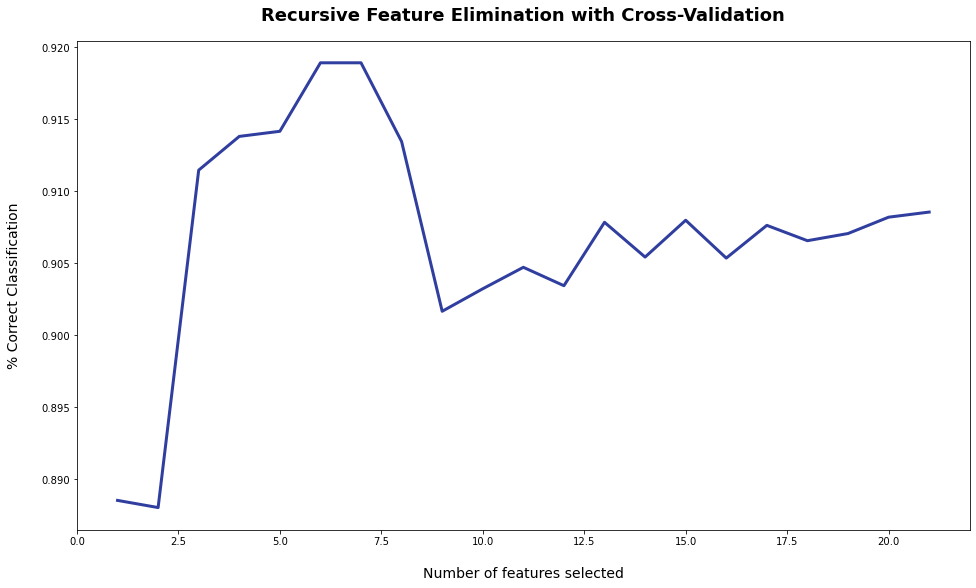

In [62]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show() 

In [63]:
print(np.where(rfecv.support_ == False)[0])

X_new=X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1)

[ 0  1  2  3  4  7  9 10 13 16 17 18 19 20]


                     attr  importance
6              PageValues    0.421859
5            PageExitRate    0.116962
4      ViewItem_TimeSpent    0.111172
0                   Ana_5    0.092279
3                ViewItem    0.087625
1                   Ana_6    0.087527
2  SellerPortal_timespent    0.082575


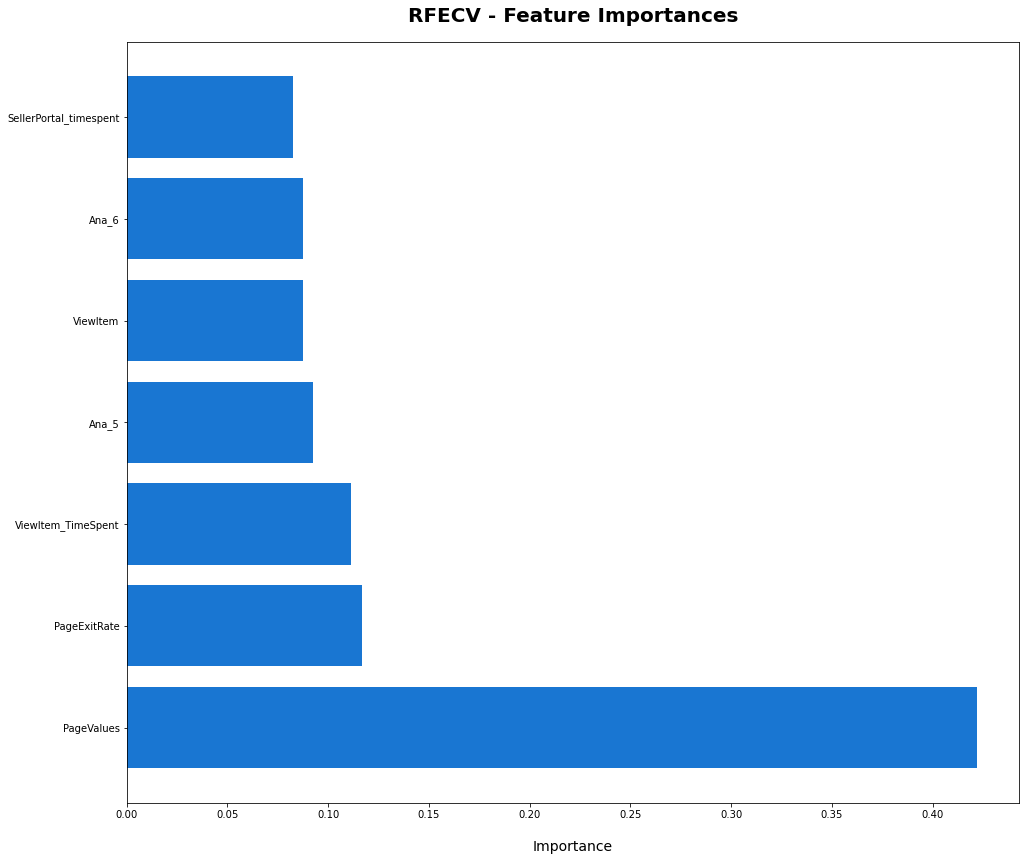

In [64]:
dset = pd.DataFrame()
dset['attr'] = X_new.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
print(dset)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [65]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='f1')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='f1')

In [66]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


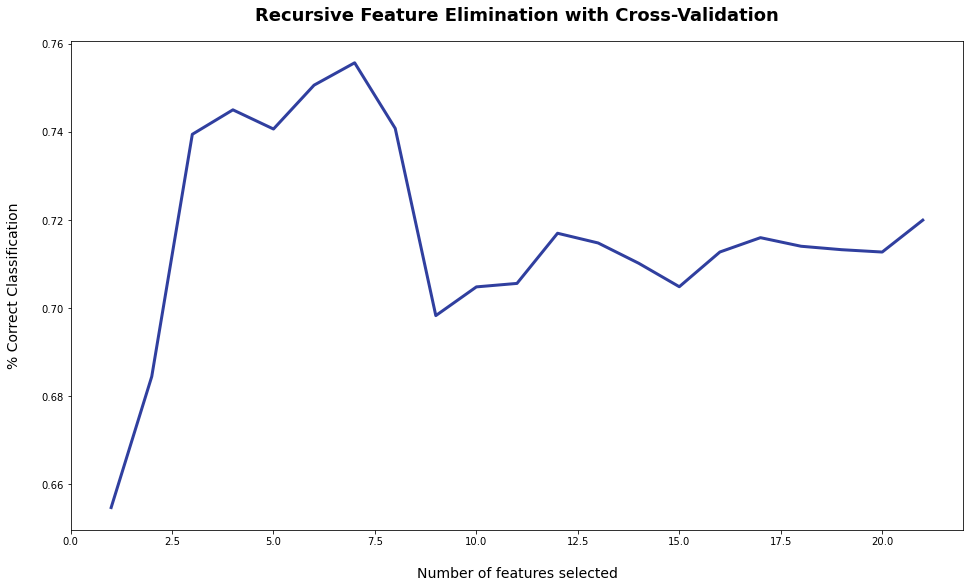

In [67]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show() 

In [68]:
print(np.where(rfecv.support_ == False)[0])

X_new=X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1)

[ 0  1  2  3  4  7  9 10 13 16 17 18 19 20]


                     attr  importance
6              PageValues    0.427148
5            PageExitRate    0.115302
4      ViewItem_TimeSpent    0.109232
0                   Ana_5    0.092314
3                ViewItem    0.087883
1                   Ana_6    0.085533
2  SellerPortal_timespent    0.082588


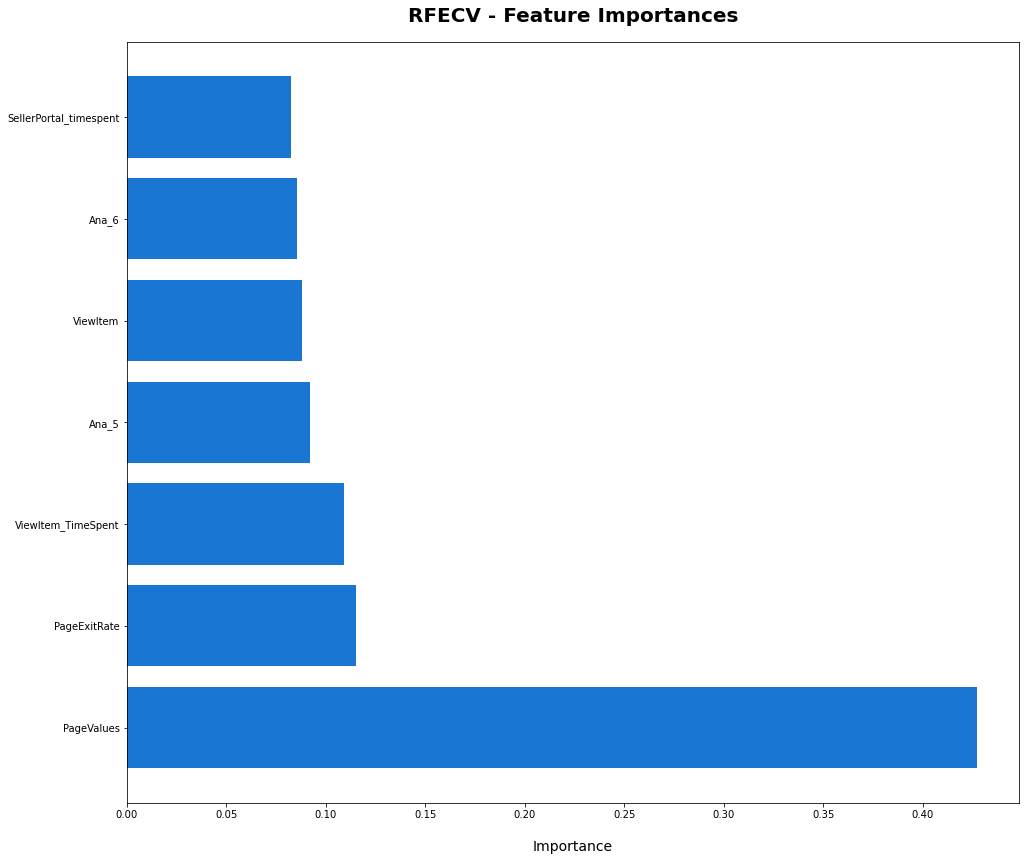

In [69]:
dset = pd.DataFrame()
dset['attr'] = X_new.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
print(dset)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

After observing all the above feature importance technique finalizing the best features for model development which are bucketed in the best_feature_combination list

In [70]:
best_feature_combination=['SellerPortal_timespent','Ana_6','ViewItem','Ana_5','ViewItem_TimeSpent','PageExitRate','PageValues']

#### Handling Imbalance Dataset

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
df['Conversion_Flag'].value_counts()/df['Conversion_Flag'].value_counts().sum()

0    0.824801
1    0.175199
Name: Conversion_Flag, dtype: float64

In [73]:
sm = SMOTE(random_state=random_state,sampling_strategy=0.35)
X_res, y_res = sm.fit_resample(X, y)

In [74]:
y_res.value_counts()/y_res.value_counts().sum()

0    0.740788
1    0.259212
Name: Conversion_Flag, dtype: float64

After applying smote we have partially balanced the data with event rate T:F , 1:3

#### Building model

In [75]:
Eva_metrics =pd.DataFrame(columns=['Model','Accuracy','Precision','Avg_Precision','Recall','F1Score','AUC_ROC score','matthews_corrcoef'])

Splitting the dataset for train and test

#### ROC Curve

### Evaluation metrics

In [76]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_score,average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
def evaluation_metric(model,clf,X_test,y_test):
    from sklearn.metrics import matthews_corrcoef
    y_pred = clf.predict(X_test)
#   model = "RF with all feature"
    model=model
    print("Accuracy score ",accuracy_score(y_test, y_pred))
    Accuracy=accuracy_score(y_test, y_pred)
    print("Precision score ",precision_score(y_test, y_pred))
    Precision=precision_score(y_test, y_pred)
    print("Avg Precision score ",average_precision_score(y_test, y_pred))
    average_precision =average_precision_score(y_test, y_pred)
    print("Recall score ",recall_score(y_test, y_pred))
    Recall=recall_score(y_test, y_pred)
    print("F1 score ",f1_score(y_test, y_pred))
    f1=f1_score(y_test, y_pred)
    print("AUC_ROC score ",roc_auc_score(y_test, y_pred))
    roc_auc=roc_auc_score(y_test, y_pred)
    print("matthews_corrcoef score ",matthews_corrcoef(y_test, y_pred))
    matthews_corrcoeff=matthews_corrcoef(y_test, y_pred)
    return model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoeff

In [78]:
def ROC_curve(clf,X_test):
    pred_probs = clf.predict_proba(X_test)
    conversion_probs = pred_probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, conversion_probs)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


#### 1. Random Forest

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33,stratify=y_res, random_state=random_state)

In [80]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
confusion_matrix(y_test, rf.predict(X_test))

array([[3595,  233],
       [ 209, 1131]], dtype=int64)

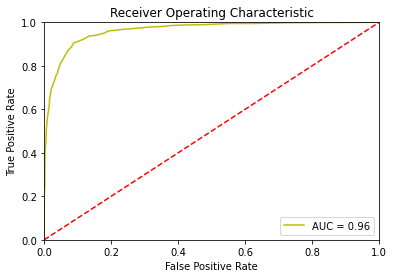

Accuracy score  0.9144736842105263
Precision score  0.8291788856304986
Avg Precision score  0.7402929075512553
Recall score  0.8440298507462687
F1 score  0.8365384615384616
AUC_ROC score  0.8915812785601771
matthews_corrcoef score  0.7786868491582126


In [82]:
ROC_curve(rf,X_test)
model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoef=evaluation_metric("RF with all feature",rf,X_test,y_test)

In [83]:
Eva_metrics.loc[0] =[model,round(Accuracy*100,2),round(Precision*100,2),round(average_precision*100,2),round(Recall*100,2),round(f1*100,2),round(roc_auc*100,2),round(matthews_corrcoef,2)]
Eva_metrics

,Model,Accuracy,Precision,Avg_Precision,Recall,F1Score,AUC_ROC score,matthews_corrcoef
0,RF with all feature,91.45,82.92,74.03,84.4,83.65,89.16,0.78


#### 2.RF with best featurer

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_res[best_feature_combination], y_res, test_size=0.33,stratify=y_res, random_state=random_state)

In [85]:
rf_bf = RandomForestClassifier(n_estimators=100)
rf_bf.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
confusion_matrix(y_test, rf_bf.predict(X_test))

array([[3561,  267],
       [ 193, 1147]], dtype=int64)

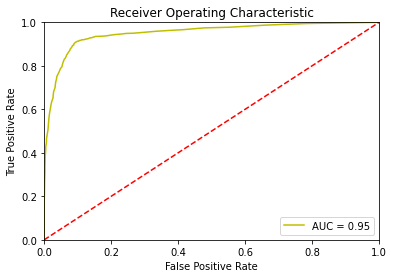

Accuracy score  0.9109907120743034
Precision score  0.8111739745403111
Avg Precision score  0.7316859092964028
Recall score  0.8559701492537314
F1 score  0.8329702251270878
AUC_ROC score  0.8931104664763955
matthews_corrcoef score  0.7728783242913164


In [87]:
ROC_curve(rf_bf,X_test)
model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoef=evaluation_metric("RF with best feature",rf_bf,X_test,y_test)

In [88]:
Eva_metrics.loc[1] =[model,round(Accuracy*100,2),round(Precision*100,2),round(average_precision*100,2),round(Recall*100,2),round(f1*100,2),round(roc_auc*100,2),round(matthews_corrcoef,2)]
Eva_metrics

,Model,Accuracy,Precision,Avg_Precision,Recall,F1Score,AUC_ROC score,matthews_corrcoef
0,RF with all feature,91.45,82.92,74.03,84.4,83.65,89.16,0.78
1,RF with best feature,91.10,81.12,73.17,85.6,83.30,89.31,0.77


#### 3.Logistic Regression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33,stratify=y_res, random_state=random_state)

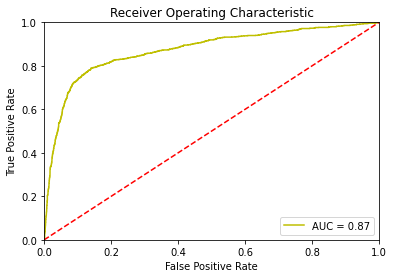

Accuracy score  0.8473297213622291
Precision score  0.812004530011325
Avg Precision score  0.55503255651276
Recall score  0.5350746268656716
F1 score  0.6450742240215924
AUC_ROC score  0.7458549727849779
matthews_corrcoef score  0.5725212244755156


In [90]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train, y_train)
ROC_curve(LR,X_test)
model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoef=evaluation_metric("LR with all feature",LR,X_test,y_test)

In [91]:
confusion_matrix(y_test, LR.predict(X_test))

array([[3662,  166],
       [ 623,  717]], dtype=int64)

In [92]:
Eva_metrics.loc[2] =[model,round(Accuracy*100,2),round(Precision*100,2),round(average_precision*100,2),round(Recall*100,2),round(f1*100,2),round(roc_auc*100,2),round(matthews_corrcoef,2)]
Eva_metrics

,Model,Accuracy,Precision,Avg_Precision,Recall,F1Score,AUC_ROC score,matthews_corrcoef
0,RF with all feature,91.45,82.92,74.03,84.40,83.65,89.16,0.78
1,RF with best feature,91.10,81.12,73.17,85.60,83.30,89.31,0.77
2,LR with all feature,84.73,81.20,55.50,53.51,64.51,74.59,0.57


#### 4. Logistic Regression with best feature

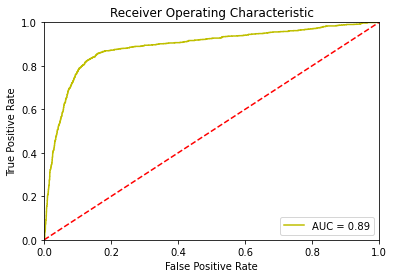

Accuracy score  0.8452012383900929
Precision score  0.8047404063205418
Avg Precision score  0.5495174918793365
Recall score  0.5320895522388059
F1 score  0.6406109613656784
AUC_ROC score  0.7434481199020571
matthews_corrcoef score  0.5661540154631819


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_res[best_feature_combination], y_res, test_size=0.33,stratify=y_res, random_state=random_state)
LR_bf=LogisticRegression().fit(X_train, y_train)
ROC_curve(LR_bf,X_test)
model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoef=evaluation_metric("LR with best feature",LR_bf,X_test,y_test)

In [94]:
confusion_matrix(y_test, LR_bf.predict(X_test),labels=[1,0])

array([[ 713,  627],
       [ 173, 3655]], dtype=int64)

In [95]:
Eva_metrics.loc[3] =[model,round(Accuracy*100,2),round(Precision*100,2),round(average_precision*100,2),round(Recall*100,2),round(f1*100,2),round(roc_auc*100,2),round(matthews_corrcoef,2)]
Eva_metrics

,Model,Accuracy,Precision,Avg_Precision,Recall,F1Score,AUC_ROC score,matthews_corrcoef
0,RF with all feature,91.45,82.92,74.03,84.40,83.65,89.16,0.78
1,RF with best feature,91.10,81.12,73.17,85.60,83.30,89.31,0.77
2,LR with all feature,84.73,81.20,55.50,53.51,64.51,74.59,0.57
3,LR with best feature,84.52,80.47,54.95,53.21,64.06,74.34,0.57


### Tuning the selected Random forest model with best features to improve performance

In [96]:
from pprint import pprint
print('Parameters currently in use for RF with best feature:\n')
pprint(rf_bf.get_params())

Parameters currently in use for RF with best feature:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Based on my previous experience and upon reading the lot of research papers and blog 
I am going to use this parameter for tuning my model using randomsearchcv algorithm

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve

#### Max depth

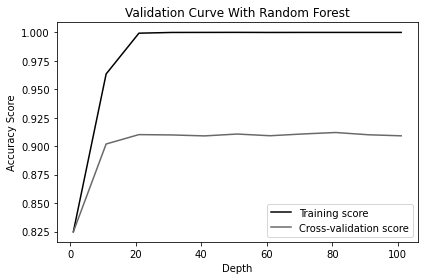

In [98]:
# Create range of values for Max Depth
param_range = np.arange(1,110,10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X[best_feature_combination], y,
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Plot mean accuracy scores for training and test sets
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="dimgrey")



# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


#### min_samples_leaf

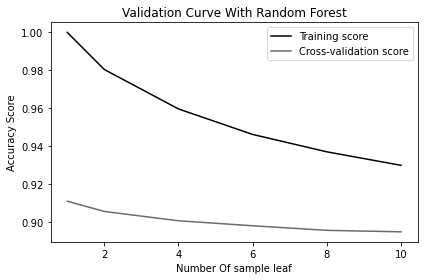

In [99]:
# Create range of values for min_samples_leaf
param_range = [1,2,4,6,8,10]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X[best_feature_combination], y, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Plot mean accuracy scores for training and test sets
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="dimgrey")



# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of sample leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


#### min_samples_split

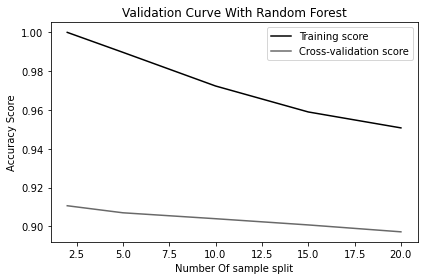

In [100]:
# Create range of values for min samples split
param_range = [2, 5, 10,15,20]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X[best_feature_combination], y, 
                                             param_name="min_samples_split", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)


# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)


# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")



# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of sample split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


#### N_estimator tuning

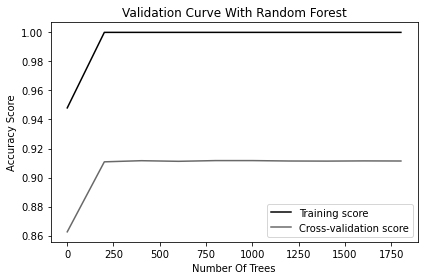

In [101]:
# Create range of values for N_estimator
param_range = np.arange(1, 2000, 200)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X[best_feature_combination], y,
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)


# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)


# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")



# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


#### Randomforest tuning using the above observation

In [102]:
# Number of trees in random forest [n_estimators]
n_estimators = [250,250,750,1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20,30, 42, 57, 80]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [20, 30, 42, 57, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [250, 250, 750, 1000]}


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_res[best_feature_combination], y_res, test_size=0.33,stratify=y_res, random_state=random_state)
rf_random = RandomizedSearchCV(estimator = rf_bf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=random_state, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 30, 42, 57, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [250, 250, 750, 1000]},
                   random_state=1, verbose=2)

In [110]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

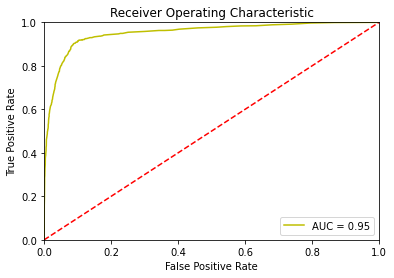

Accuracy score  0.9106037151702786
Precision score  0.8074229691876751
Avg Precision score  0.730929496700487
Recall score  0.8604477611940299
F1 score  0.833092485549133
AUC_ROC score  0.8943043403671298
matthews_corrcoef score  0.7728585436474894


array([[ 713,  627],
       [ 173, 3655]], dtype=int64)

In [104]:
ROC_curve(rf_random,X_test)
model,Accuracy,Precision,average_precision,Recall,f1,roc_auc,matthews_corrcoef=evaluation_metric("RF_tuned_with best feature",rf_random,X_test,y_test)
confusion_matrix(y_test, LR_bf.predict(X_test),labels=[1,0])

In [105]:
Eva_metrics.loc[4] =[model,round(Accuracy*100,2),round(Precision*100,2),round(average_precision*100,2),round(Recall*100,2),round(f1*100,2),round(roc_auc*100,2),round(matthews_corrcoef,2)]

### Model comparison

In [106]:
Eva_metrics

,Model,Accuracy,Precision,Avg_Precision,Recall,F1Score,AUC_ROC score,matthews_corrcoef
0,RF with all feature,91.45,82.92,74.03,84.40,83.65,89.16,0.78
1,RF with best feature,91.10,81.12,73.17,85.60,83.30,89.31,0.77
2,LR with all feature,84.73,81.20,55.50,53.51,64.51,74.59,0.57
3,LR with best feature,84.52,80.47,54.95,53.21,64.06,74.34,0.57
4,RF_tuned_with best feature,91.06,80.74,73.09,86.04,83.31,89.43,0.77


### Conclusion

Clearly, Random forest is the best model to predict the conversion rate.
        * RF with best feature combination does better which is evident from the evalution metrics.
        
  From Business View:
  
          Using RF with best feature model says 82 of the 100 actual leads ended up making a  
          purchase. Meaning converison rate using this model is 82%.
          
          Let if we are interested in the capture rate then this model will capture 85 out of 100 actual targeted user. 
          
          To put it simply, precision is the ability of converting as many visitors to buyers as possible, recall is the 
          ability capture as many of the target segment as possible
          